## Dashboarding Movie Ratings for a Recommedation System 

### Team 4 | Spring 2019 | Dr. Thompson 

**Kush Shah, Pallav Jhaveri, Darshan Shah, Anusha Balaji** 

The following notebook serves to further explore the MovieLens dataset to uncover and understand some relationships in the data. 

In [1]:
!pip install google-cloud

In [7]:
import google.datalab.bigquery as bq

In [3]:
genres = ['Action', 'Adventure', 'Animation', 'Children', 
          'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
         'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
         'Sci-Fi', 'Thriller', 'War', 'Western']

In [3]:
import pandas as pd;
import numpy as np; 
import matplotlib.pyplot as plt;
import seaborn as sns; 

### Movie Counts Across Genres 

In [5]:
genre_sql = "Select genre, count(movieId) as genre_count \
from MovieRatings_Project.Movies_GenreRows \
group by genre"

In [6]:
df = bq.Query(genre_sql).execute().result().to_dataframe()

In [7]:
df 

,genre,genre_count
0,War,1820
1,IMAX,197
2,Crime,5105
3,Drama,24144
4,Action,7130
5,Comedy,15956
6,Horror,5555
7,Sci-Fi,3444
8,Fantasy,2637
9,Musical,1113


Above dataframe ***df*** shows the number of movies belonging to each genre in the dataset. 

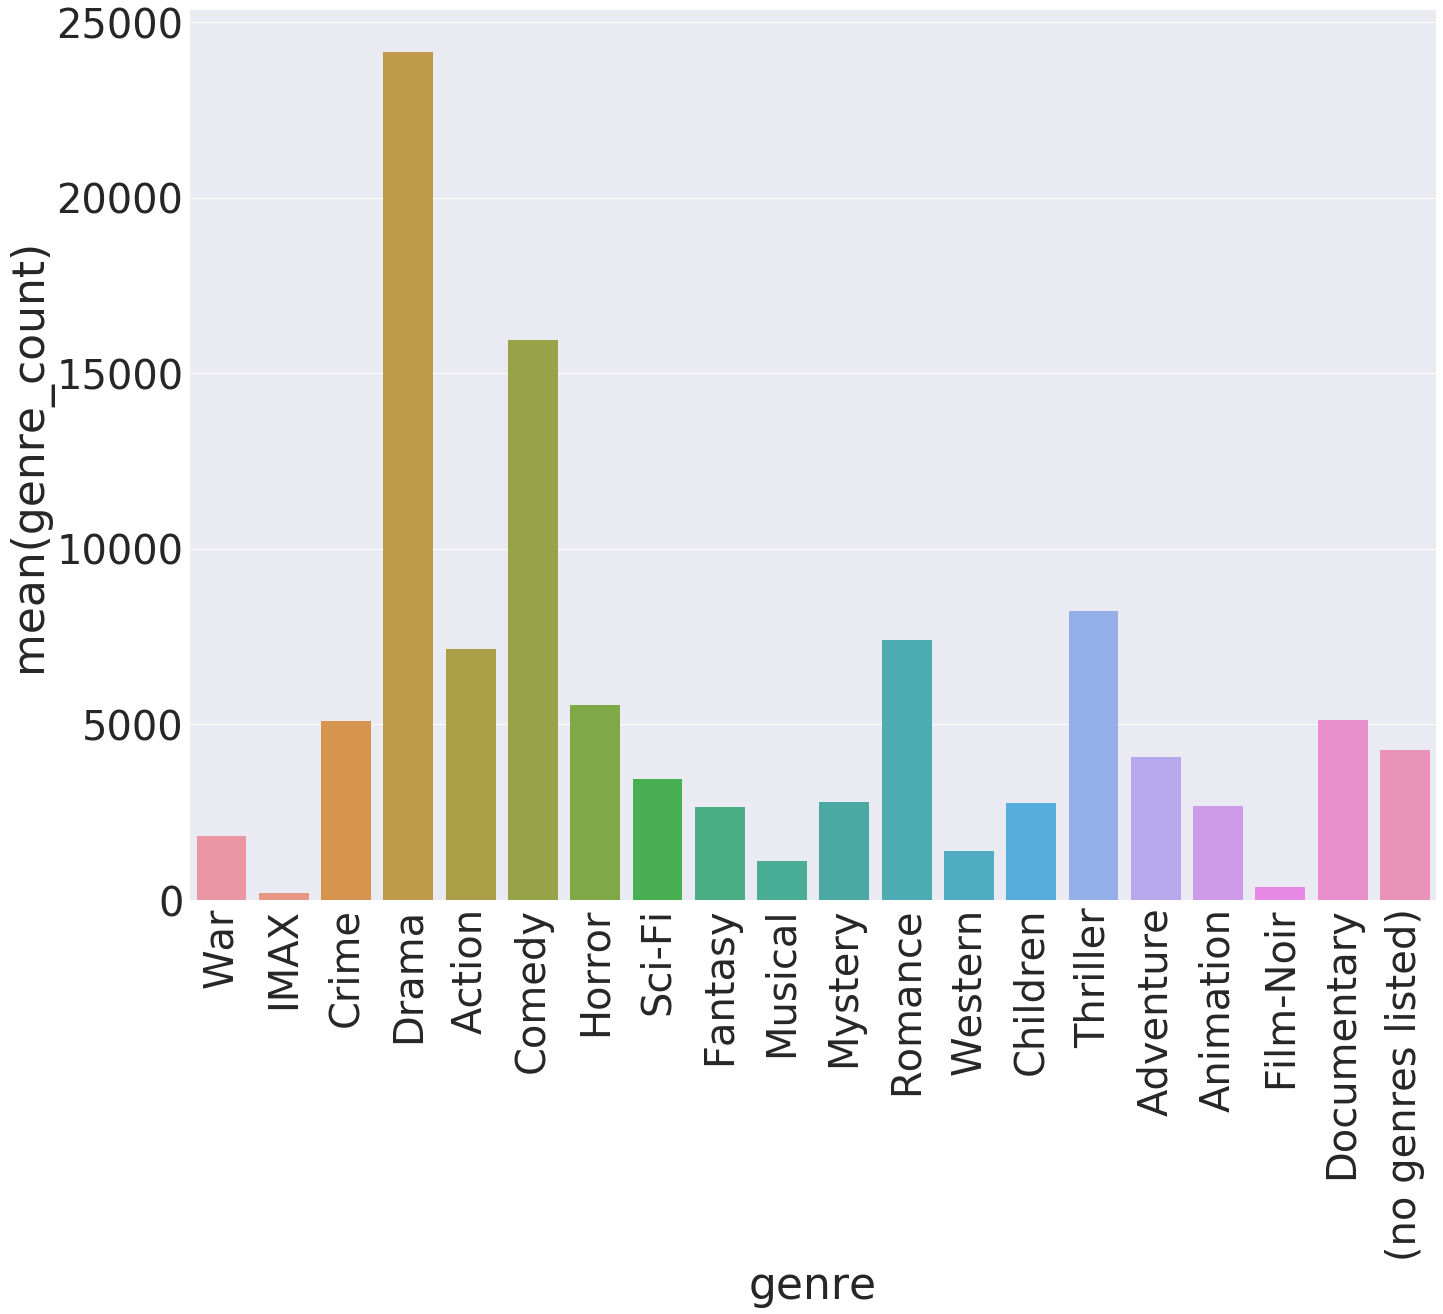

In [10]:
genres_df = df
fig, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation=90)                                                               
plt.tight_layout()
sns.set(font_scale=4)
sns.barplot(ax=ax, x = 'genre', y = 'genre_count', data=genres_df)

> <font color="#A00C3D" size=5em>The above barplot displays number of movies belonging to each genere in the dataset. It looks like **Drama** is the most popular one in the dataset with about 24,000 movies followed by **Comedy** with almost 16k movies. Least popular genres are **Film-Noir** and **IMAX**. </font> 

*** 

In [11]:
year_sql = "Select year, count(distinct movieId) as total_movies_over_year \
from MovieRatings_Project.Movies \
group by year order by year asc "

In [12]:
year_df = bq.Query(year_sql).execute().result().to_dataframe()

In [13]:
year_df

,year,total_movies_over_year
0,0,326
1,1874,1
2,1878,1
3,1883,1
4,1887,1
5,1888,4
6,1890,5
7,1891,6
8,1892,3
9,1893,1


In [14]:
year_ranges = ['1874-1899', '1900-1919', '1920-1939', '1940-1959', 
               '1960-1979', '1980-1999', '2000-2018', 'unknown']
values = [0, 0, 0, 0, 0, 0, 0, 0]
for idx, row in year_df.iterrows():
  if row['year'] == 0:
    values[7] += row['total_movies_over_year'] 
  elif row['year'] < 1900:
    values[0] += row['total_movies_over_year']
  elif row['year'] < 1920:
    values[1] += row['total_movies_over_year']
  elif row['year'] < 1940:
    values[2] += row['total_movies_over_year'] 
  elif row['year'] < 1960:
    values[3] += row['total_movies_over_year'] 
  elif row['year'] < 1980:
    values[4] += row['total_movies_over_year'] 
  elif row['year'] < 2000:
    values[5] += row['total_movies_over_year'] 
  elif row['year'] < 2018:
    values[6] += row['total_movies_over_year'] 

In [15]:
data = {'year_range': year_ranges, 'movie_count': values}
year_df_small = pd.DataFrame.from_dict(data)
year_df_small

,movie_count,year_range
0,102,1874-1899
1,364,1900-1919
2,2460,1920-1939
3,4969,1940-1959
4,8149,1960-1979
5,11522,1980-1999
6,29345,2000-2018
7,326,unknown


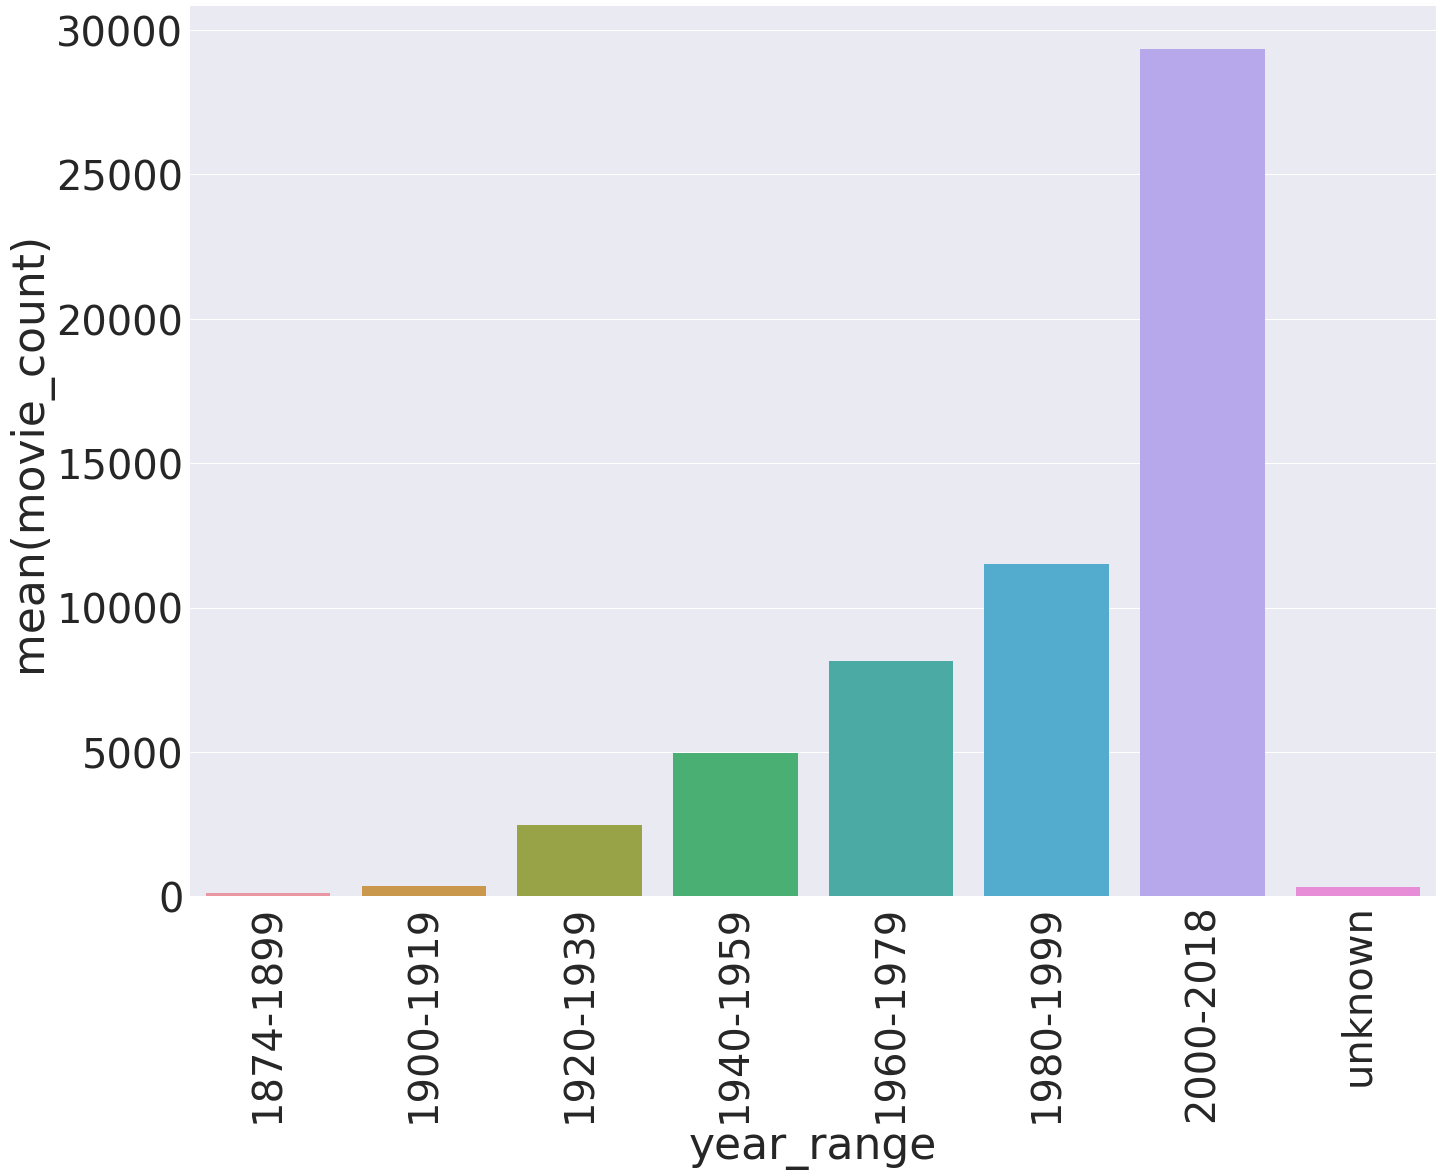

In [16]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation=90)                                                               
plt.tight_layout()
sns.set(font_scale=5)
sns.barplot(ax=ax, x='year_range', y='movie_count', data=year_df_small)

> <font color="#0A10B9" size=5em>As seen by the bar graph above, **most of the movies represented in the dataset seem to be latest ones**, belonging to 2000's and 2010's decades. There are only a few movies from late 1800s and early 20th century. </font> 

*** 

### Number of User Ratings Across Genres 

In [17]:
ratings_count_sql = " \
Select genre, rating, count(rating) as number_of_ratings \
from MovieRatings_Project.Ratings inner join MovieRatings_Project.Movies_GenreRows \
on Ratings.movieId = Movies_GenreRows.movieId \
group by genre, rating order by rating asc"

In [18]:
rating_genre_count = bq.Query(ratings_count_sql).execute().result().to_dataframe()

In [19]:
rating_genre_count

,genre,rating,number_of_ratings
0,Animation,0.5,32228
1,Western,0.5,6068
2,Comedy,0.5,187410
3,Action,0.5,141698
4,Fantasy,0.5,59747
5,Horror,0.5,55915
6,Musical,0.5,18180
7,Thriller,0.5,106296
8,Romance,0.5,73580
9,War,0.5,14647


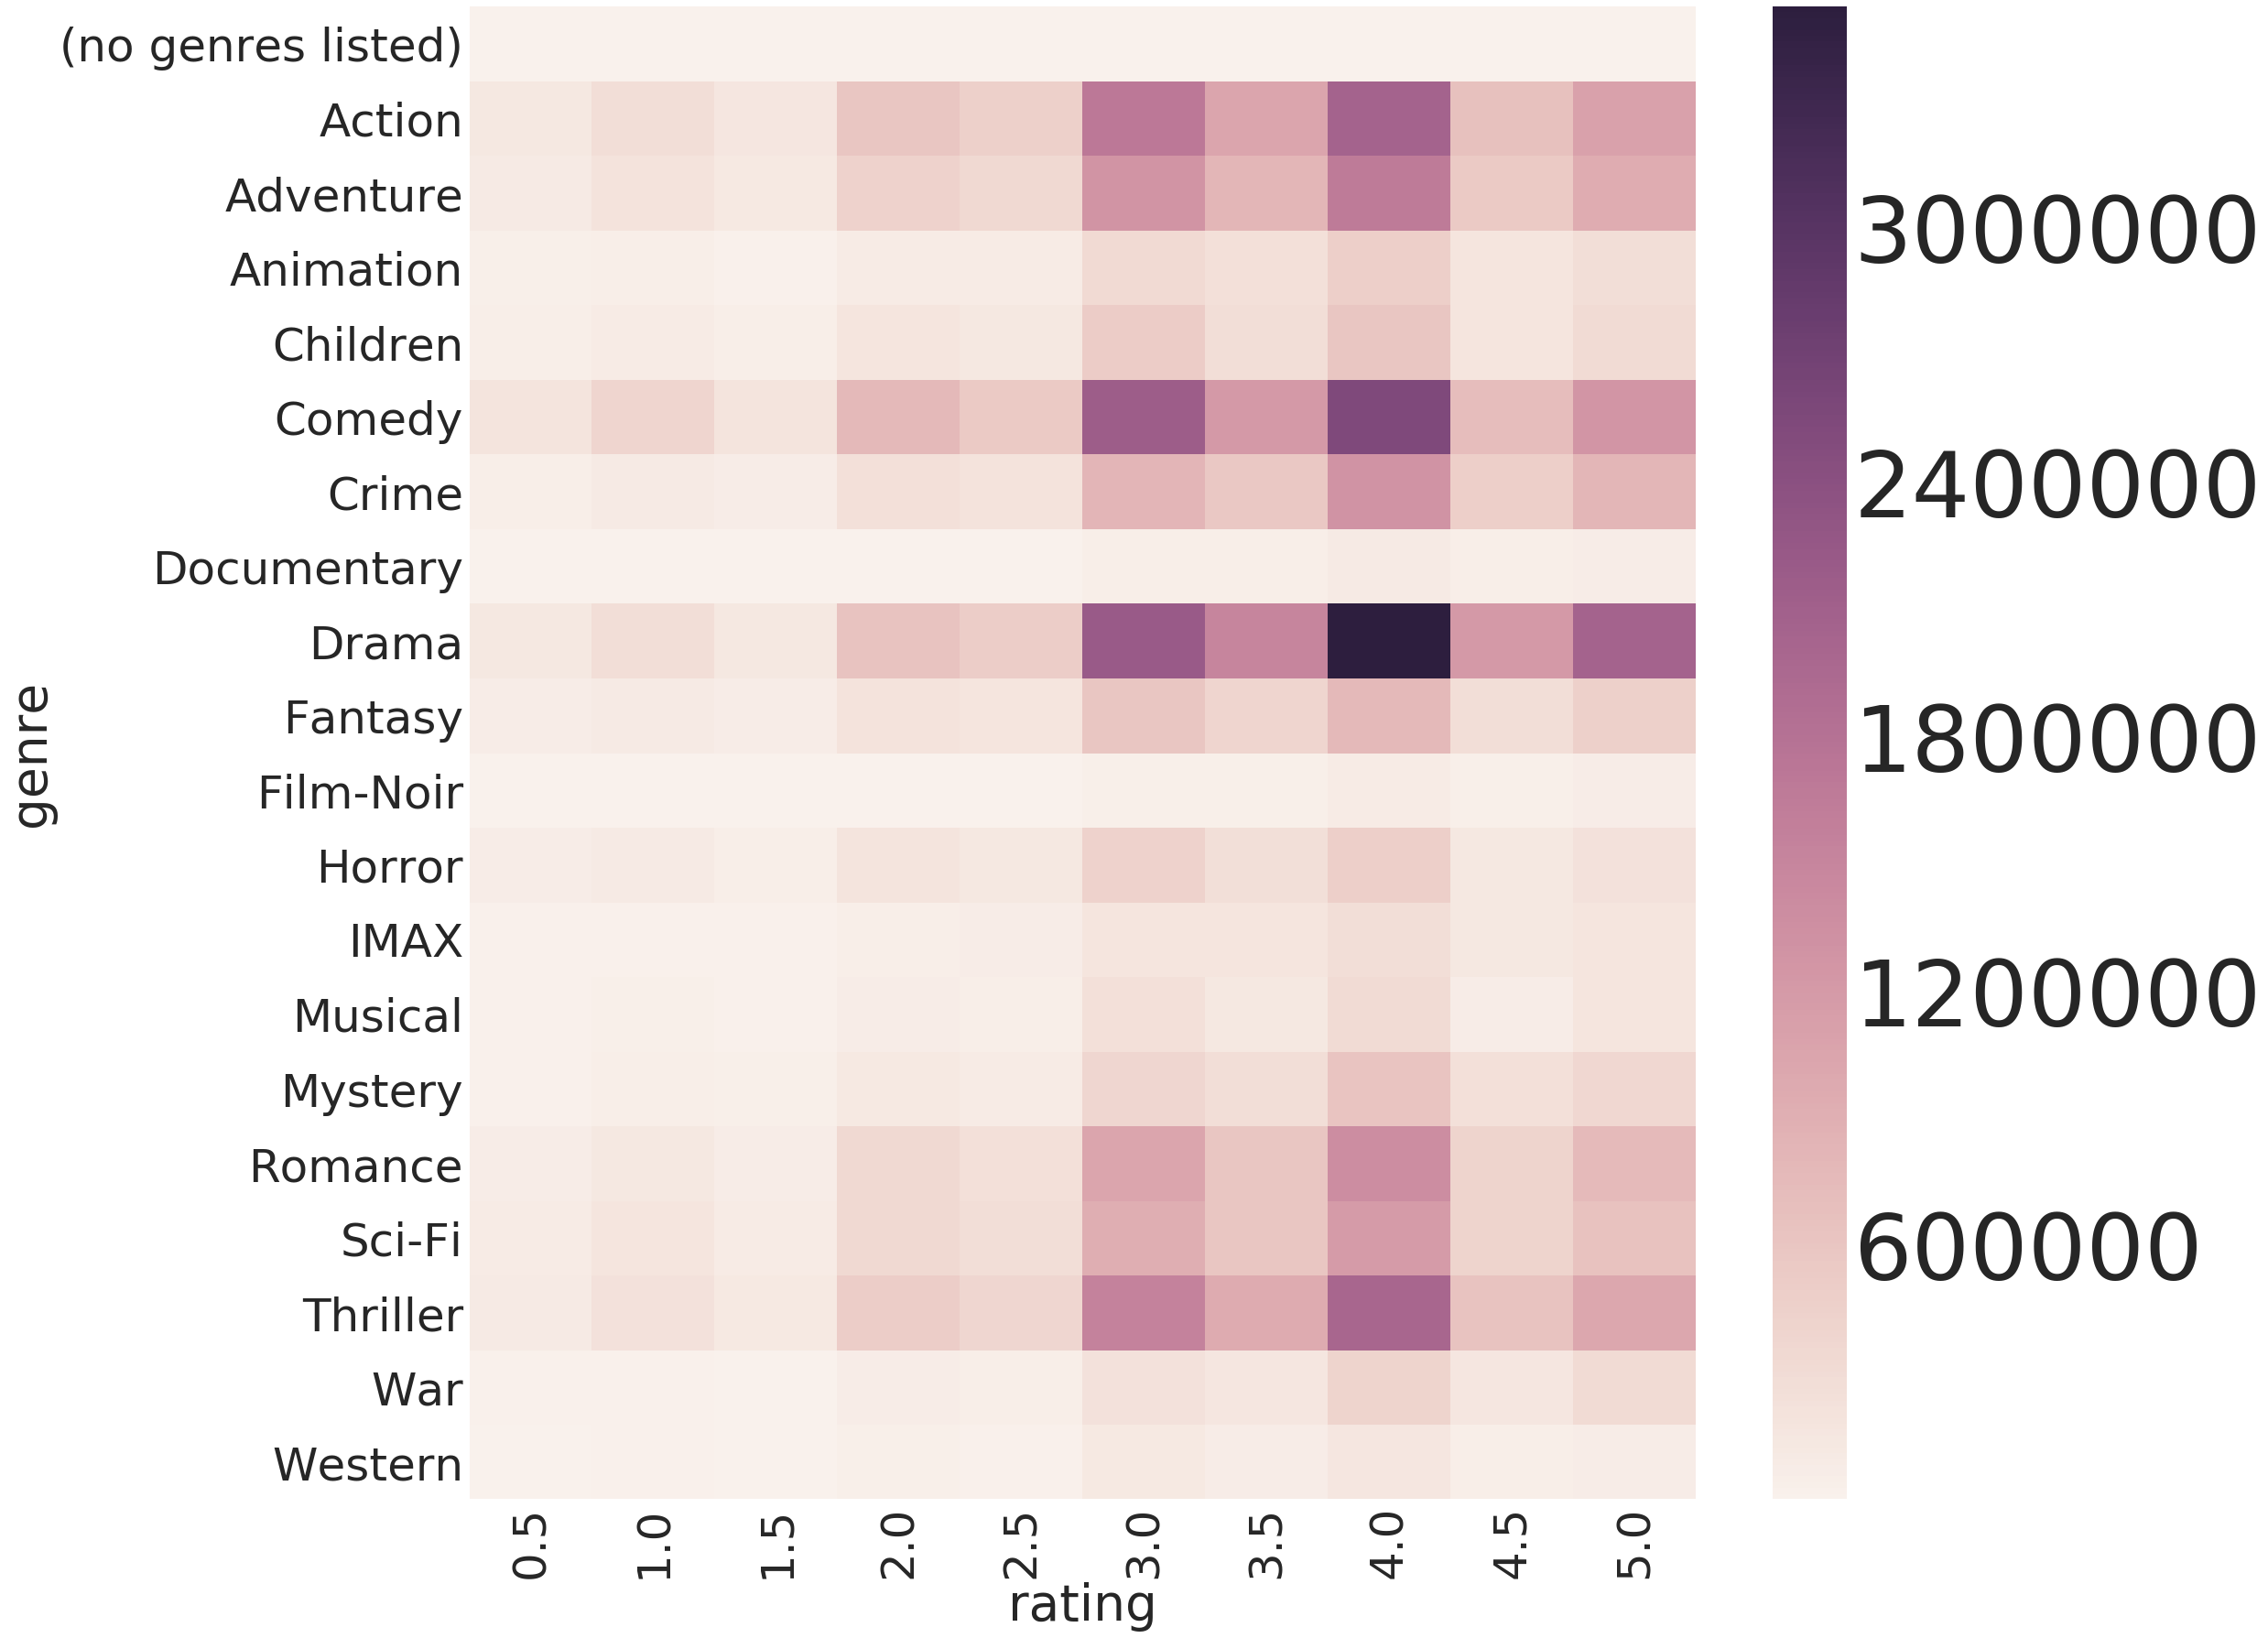

In [20]:
rating_genre_pivot = rating_genre_count.pivot("genre", "rating", "number_of_ratings")
fig, ax = plt.subplots(figsize=(30, 30))
plt.xticks(rotation=90)                                                               
sns.set(font_scale=10)
ax=sns.heatmap(rating_genre_pivot)

<font color="#055E2B" size=3em><b>Above is a heat map showing number of user ratings across the genres and across the rating point-scale. Following are a few takeaways from the map: 
<ul>
    <li>There are very few ratings with values less than 2.5 out of 5 points. </li>
    <li>There is an unequal distribution of user ratings among the genres. Only a few genres (<font color="#0C20A0">Drama, Comedy, Action, Adventure, and Thriller</font>) have a lot of ratings while the other ones have much fewer ratings. </li>
    <li>Rating scores follow a bell-curve pattern slightly skewed to the left, meaning most ratings are centered around 3.0 and 4.0 stars and there are signficantly fewer rating scores below 3. </li>
    </b>
</font>

*** 

### Average User Ratings Across Genres 

In [4]:
avg_ratings_genre_sql = " \
Select genre, avg(rating) as avg_rating \
from MovieRatings_Project.Ratings inner join MovieRatings_Project.Movies_GenreRows \
on Ratings.movieId = Movies_GenreRows.movieId \
group by genre order by avg_rating asc"

In [8]:
avg_rating_genre = bq.Query(avg_ratings_genre_sql).execute().result().to_dataframe()

In [9]:
avg_rating_genre

,genre,avg_rating
0,Horror,3.284378
1,(no genres listed),3.291397
2,Comedy,3.419787
3,Children,3.423893
4,Action,3.462566
5,Sci-Fi,3.470476
6,Fantasy,3.507208
7,Adventure,3.513284
8,Thriller,3.518801
9,Romance,3.541862


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/envs/py3env/lib/python3.5/site-packages/seaborn/categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


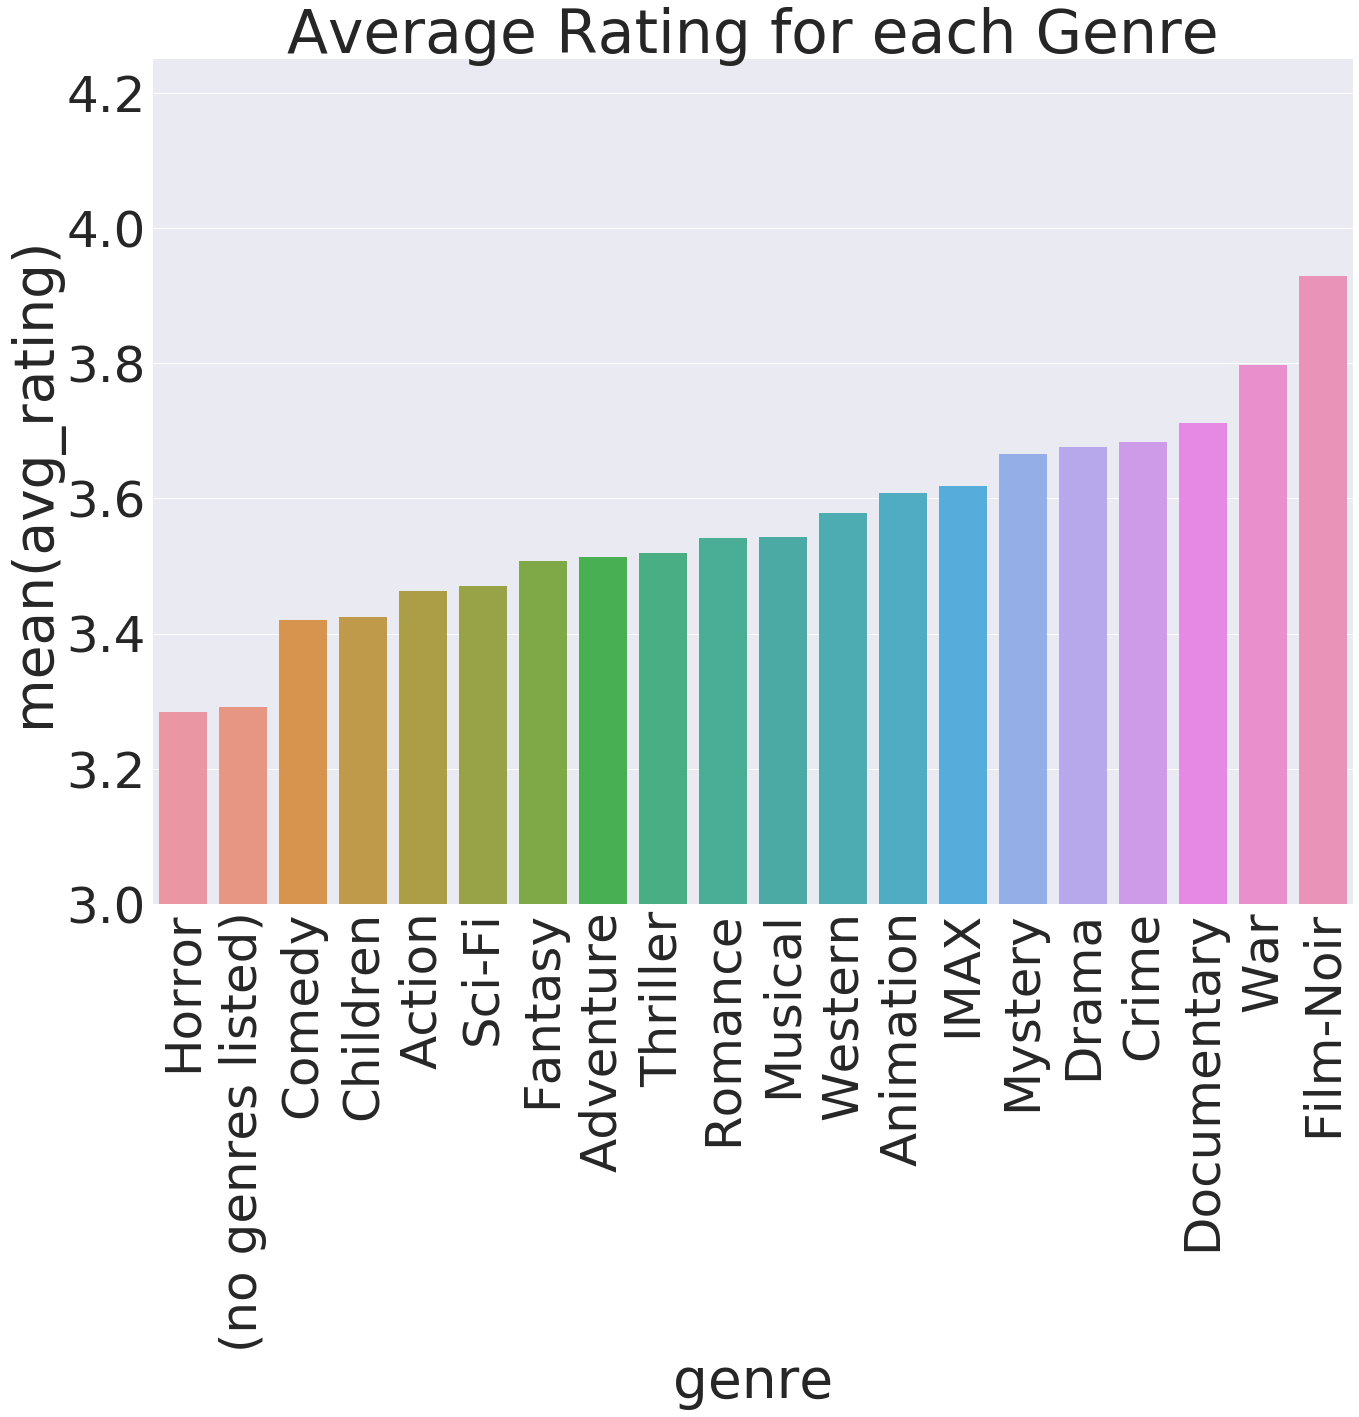

In [16]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation=90)                                                               
plt.tight_layout()
sns.set(font_scale=5)
plt.title('Average Rating for each Genre')
sns.plt.ylabel='Average Rating (0-5 points)' 
sns.plt.ylim(3, 4.25)
sns.barplot(x="genre", y="avg_rating", data=avg_rating_genre)
plt.show()

> The above plot shows the average rating score for each genre in the dataset. **Among the highly-rated genres include: Film-Noir, War, Documentary** closely followed by Crime, Drama, and Mystery. 

> This trend is a little suprising given the previous plots. **Drama and Comedy seem to be the most popularly watched** and rated genres among users, **however when it comes to quality, lesser popular genres like Film-Noir, War and Documentary seem to steal the show.** 

*** 